# Classificação binária simples

Neste caso, vamos classificar o potencial de finalização de um projeto a partir da projeção de tempo de trabalho e a expectativa de pagamento.

In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
# renomeando as colunas
renomear_col = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}

dados.rename(columns=renomear_col, inplace = True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# criando coluna binaria sobre o projeto estar finalizado ou não para evitar duplo negativo (falso para não finalizado)
troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.sample(5)

,nao_finalizado,horas_esperadas,preco,finalizado
772,0,92,5548,1
1173,0,36,409,1
1551,0,63,2694,1
1328,0,72,4523,1
72,1,64,1808,0


## Visualização dos dados

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

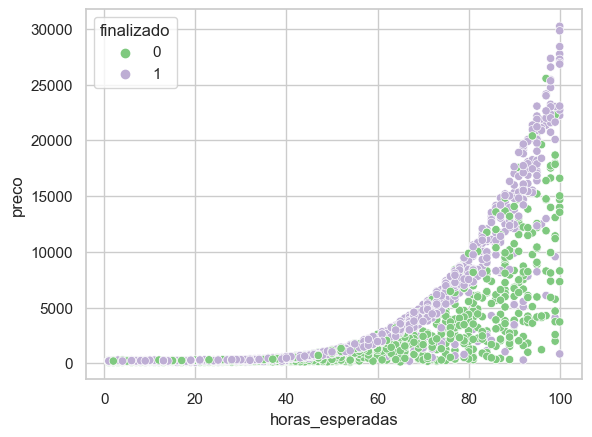

In [5]:
import seaborn as sns

sns.set_theme(style = 'whitegrid', palette = 'Accent')
sns.scatterplot(data = dados, x = 'horas_esperadas', y = 'preco', hue = 'finalizado')

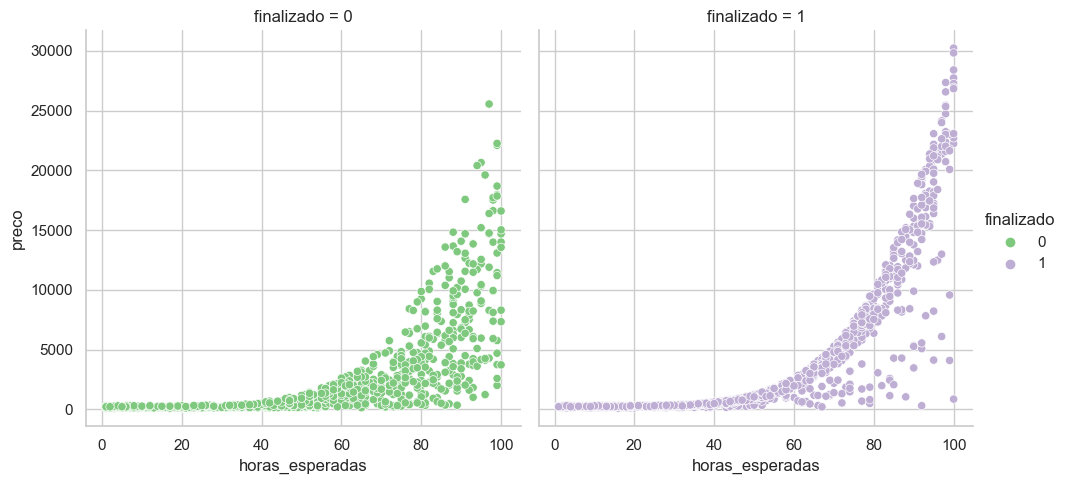

In [6]:
sns.relplot(data = dados, x = 'horas_esperadas', y = 'preco', hue = 'finalizado', col = 'finalizado')

A partir destes gráficos é possível suspeitar que a finalização dos projetos dependem de uma certa relação entre o valor do projeto e horas de trabalho esperadas.

## Ajustando o modelo

In [7]:
# definindo as variáveis explicativas e a dependente
x = dados[['horas_esperadas', 'preco']]
y = dados.finalizado

In [8]:
# separação entre teste e treino
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

seed = 5
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# ajustando o modelo
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

# avaliando o modelo
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 1617 observações e testaremos com 540.
A acurácia foi 49.26%


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Avaliação da acurácia em relação a outro modelo

In [9]:
# modelo de linha de base
previsoes_baseline = np.ones(len(teste_y))
acuracia_baseline = accuracy_score(teste_y, previsoes_baseline) * 100
print('A acurácia do modelo de linha de base foi %.2f%%, que é %.2f%% menor que o modelo estimado' % (acuracia_baseline, (1 - acuracia_baseline/acuracia)*100))

A acurácia do modelo de linha de base foi 52.59%, que é -6.77% menor que o modelo estimado


## Identificando o problema

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

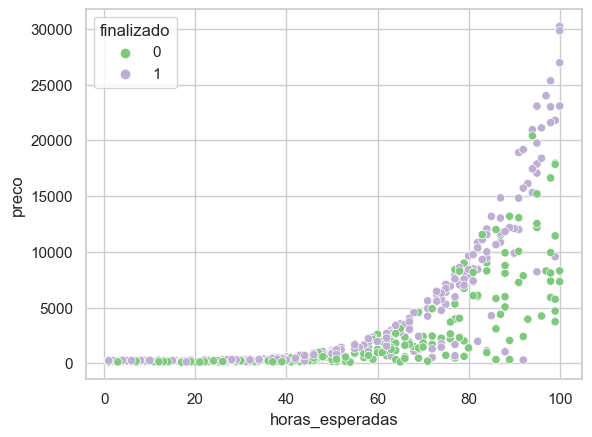

In [10]:
sns.scatterplot(data = teste_x, x = 'horas_esperadas', y = 'preco', hue = teste_y)

Para explorar um pouco mais, vamos plotar um heatmap para a previsão esperada dentro da amplitude do gráfico

In [11]:
x_min, x_max = teste_x.horas_esperadas.min(), teste_x.horas_esperadas.max()
y_min, y_max = teste_x.preco.min(), teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [12]:
# definindo o grid
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)
eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [13]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [14]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

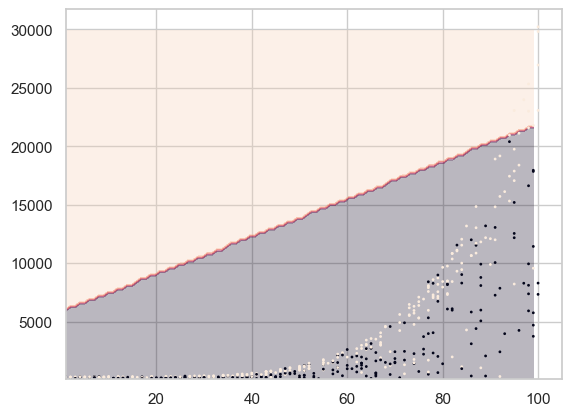

In [15]:
import matplotlib.pyplot as plt

# limite de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s=1)

Conseguimos observar que o grande problema do modelo é que ele está se ajustando a uma reta, enquanto que os nossos dados se aproximam de uma curva. Então será necessário ajustar outra curva para termos um novo ajuste.

## Ajustando modelo não linear

In [18]:
# separação entre teste e treino
from sklearn.svm import SVC

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# ajustando o modelo
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

# avaliando o modelo
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 1617 observações e testaremos com 540.
A acurácia foi 60.37%


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


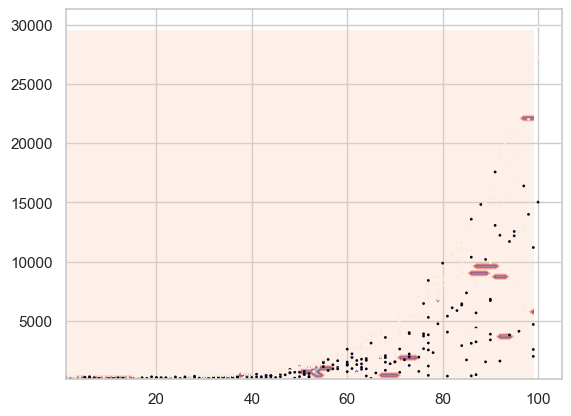

In [20]:
# gerando a borda de decisão
x_min, x_max = teste_x.horas_esperadas.min(), teste_x.horas_esperadas.max()
y_min, y_max = teste_x.preco.min(), teste_x.preco.max()

# definindo o grid
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

# limite de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s=1)

Mesmo que haja uma melhora, o resultado ainda não é ideal. Um dos motivos é que esses modelos são muito sensíveis ao tamanho da escala. Então é necessário que as variáveis independentes sejam padronizadas.

## Ajustando modelo com variáveis padronizadas

In [21]:
from sklearn.preprocessing import StandardScaler

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,  stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# padronizando as variáveis
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# ajustando o modelo
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

# avaliando o modelo
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 1617 observações e testaremos com 540.
A acurácia foi 67.04%


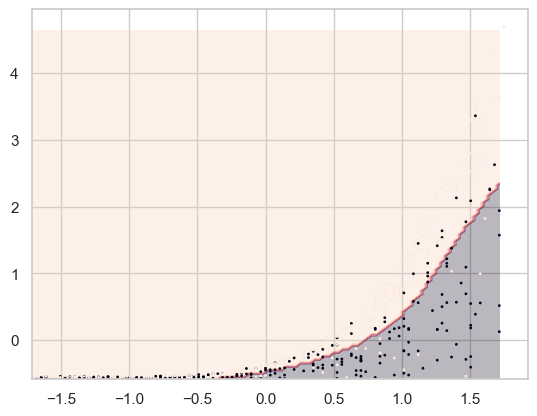

In [23]:
# como padronizamos, teste_x está em outro formato
horas_standard = teste_x[:,0]
preco_standard = teste_x[:,1]

# gerando a borda de decisão
x_min, x_max = horas_standard.min(), horas_standard.max()
y_min, y_max = preco_standard.min(), preco_standard.max()

# definindo o grid
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

# limite de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(horas_standard, preco_standard, c = teste_y, s=1)